<a href="https://colab.research.google.com/github/BadPrograms/Sanger-s-Optimized/blob/main/Sanger's_rule(General_Hebbian_Algorithm)_Whole_image_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numba import njit
#@njit
# Set random seed for reproducibility
np.random.seed(1000)

# Create and scale dataset
X, _ = make_blobs(n_samples=10000, centers=2, cluster_std=1, random_state=1300)

In [12]:
#scaling of values ( X- mean(X))
scaler = StandardScaler(with_std=False)
Xs = scaler.fit_transform(X)

In [13]:
Q = np.cov(X.T)
eigu, eigv = np.linalg.eig(Q)
print(eigv)

[[-0.93357307 -0.35838712]
 [ 0.35838712 -0.93357307]]


In [14]:
#General Hebbian Algorithm function

def gha(X,pcs,learning_rate=0.01,iterations=20000):
    t=0
    W=np.random.normal(scale=0.1, size=(pcs, len(X[0,:])))
    #print(W)
    for _ in range(1,iterations):
      dw=np.zeros(W.shape)
      y=np.dot(W,X.T)
      h=np.dot(y,X)
      ah=np.tril(np.dot(y,y.T))
      #print(ah.shape)
      dw=learning_rate/((_)**2)*(h-np.dot(ah,W))
      W+=dw
      #W /= np.linalg.norm(W,axis=1).reshape((len(W[:,1]),1))
      W=normalize(W)
    return W
 

In [15]:
Xs.shape

(10000, 2)

In [16]:
a=gha(Xs,2)


In [17]:
#print(a)
a3=np.flip(a,1)
print(a3)

[[ 0.93357307  0.35838712]
 [-0.36754088  0.93000737]]


In [18]:
import PIL as pil
from google.colab import files
import sys
import io
uploaded = files.upload()
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt



Saving blobs.png to blobs (1).png


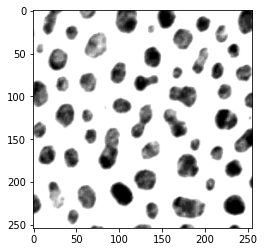

In [423]:
im = pil.Image.open(io.BytesIO(uploaded['blobs.png']))
#im.show()

plt.imshow(im)
plt.show()

(254, 256)


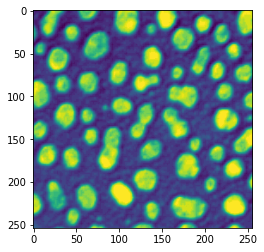

In [424]:
imarray = np. array(im)
print(imarray.shape)
plt.imshow(imarray)

In [425]:
#imarray = scaler.fit_transform(imarray)
#print(gha(imarray,5))




In [426]:
#selecting randomly subimages
def sub_images(im,leng=8,times=10000):
  ims=np.zeros((leng,leng,times))
  for _ in range(times):
    i= np.random.randint(len(im)-leng-1)
    j=np.random.randint(len(im)-leng-1)
    for o in range(leng):
      for p in range(leng):
        ims[o,p,_]=im[o+i,p+j]
  return ims

#function for image flattening row1->row2->row3...

def flatten_img(im,times=10000):
  
  vals=np.zeros((len(im)**2,times))
  #print(vals[0,0])
  for _ in range(times):
    f=0
    for j in range(0,len(im)):
      for i in range(0,len(im)):
        vals[f,_]=im[i,j,_]
        f+=1
        #print(f)
  return vals


In [427]:
a=sub_images(imarray)
#print(a.shape)
a=np.array(flatten_img(a))
#print(a.shape)
a=a.T
a= scaler.fit_transform(a)
#a=a.T
print(a.shape)

(10000, 64)


In [428]:
wei=gha(a,10)
wei=np.flip(wei,axis=1)

print((wei.shape))

(10, 64)


In [500]:
print(wei.shape)
wei=normalize(wei)

(10, 64)


In [501]:
#coefficients algorithm
#to flattened filtro ka9e grammh
#oso pane oi grammes meiwnetai h shmantikothta
#plt.imshow(a)

def coef(ar,pca,weights,startingi=0,startingj=0):
  v=np.zeros((256,256,pca))
  for number in range(0,pca):
    for i in range(245-1):
      for j in range(245-1):
        for q in range(8):
          for p in range(8):
            v[i,j,number]+=weights[number,p+8*q]*ar[p+i+startingi,q+j+startingj]
  return v
print(len(a))
coefs=coef(imarray,8,wei)
#coefs

#print(coefs)

240


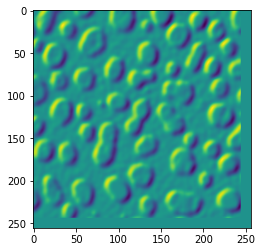

In [502]:
plt.imshow(coefs[:,:,1])

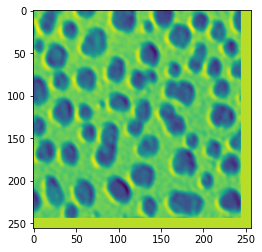

In [503]:
b=(coefs[:,:,0])
for _ in range(1,7):
  b+=(coefs[:,:,_])

plt.imshow(b)

In [504]:

def recon_im(weights,coefs,number=0,startingi=0,startingj=0):
  weights=weights.T
  #coefs=normalize(coefs)
  rec_im=np.zeros((240,240))
  for i in range(230):
    for j in range(230):
      for p in range(8):
          for q in range(8):
            rec_im[p+i,q+j]+=weights[p+8*q,number]*coefs[i,j,number]
  #rec_im=rec_im[4:12,4:12]
  return rec_im



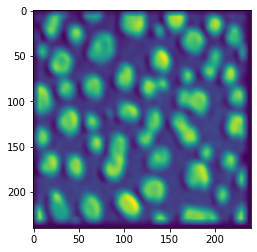

In [505]:
plt.imshow(recon_im(wei,coefs))

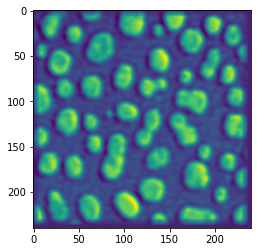

In [506]:
a=np.zeros((240,240))
for _ in range(7):
  a+=(recon_im(wei,coefs,_))

plt.imshow(a)

In [507]:
def nmse(imreal,imrec):
  sam_2=0
  sam=0
  for i in range(len(imreal)):
    for j in range(len(imreal)):
      sam_2+=(imreal[i,j]-imrec[i,j])**2
      sam+=imreal[i,j]**2
  print("NMSE is",sam_2/sam*100,"%")
  return sam_2/sam

nmse(normalize(imarray[0:230,0:230]),normalize(a[0:230,0:230]))

NMSE is 6.613465407996934 %


0.06613465407996934

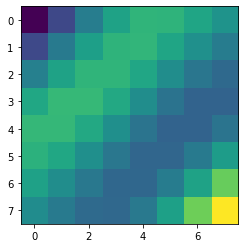

In [523]:
def weights2mask(pca,weights,startingi=0,startingj=0):
  v=np.zeros((8,8,pca))
  for number in range(0,pca):

    for q in range(8):
          for p in range(8):
            v[p,q,number]=weights[number,p+8*q]
  return v
plt.imshow((weights2mask(8,wei)[:,:,7]))